In [1]:
import cv2 
import easygui 
import numpy as np 
import imageio 
import sys 
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [4]:
originalmage = cv2.imread('test3.jpeg') #path of the image
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
print(originalmage) #as array

[[[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [181 206 255]
  [125 146 211]
  [ 18  38 107]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [181 206 255]
  [125 146 211]
  [ 18  38 107]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [183 205 255]
  [125 146 211]
  [ 17  37 106]]

 ...

 [[182 192 191]
  [183 193 192]
  [180 192 190]
  ...
  [ 23  72 175]
  [ 33  81 183]
  [ 63 113 212]]

 [[181 191 190]
  [181 191 190]
  [177 189 187]
  ...
  [ 46  98 200]
  [ 32  81 183]
  [ 30  82 183]]

 [[182 192 191]
  [181 191 190]
  [176 188 186]
  ...
  [ 67 119 221]
  [ 35  87 189]
  [ 10  62 163]]]


In [5]:
if originalmage is None:
    print("Can not find any image. Choose appropriate file")
    sys.exit()

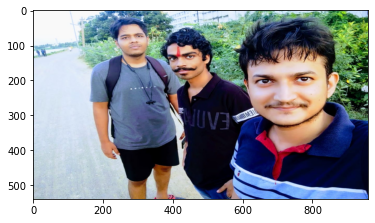

In [6]:
ReSized1 = cv2.resize(originalmage, (960, 540))
plt.imshow(ReSized1, cmap='gray')

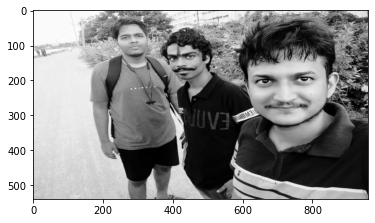

In [7]:
grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
plt.imshow(ReSized2, cmap='gray')

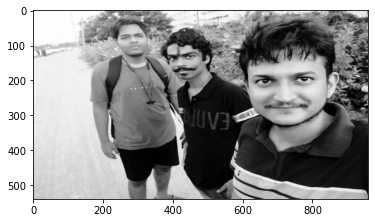

In [8]:
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
plt.imshow(ReSized3, cmap='gray')

In [9]:
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 9, 9)

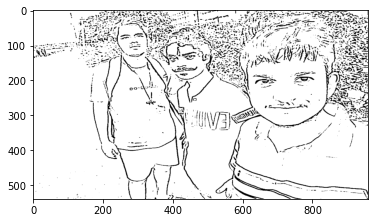

In [10]:
ReSized4 = cv2.resize(getEdge, (960, 540))
plt.imshow(ReSized4, cmap='gray')

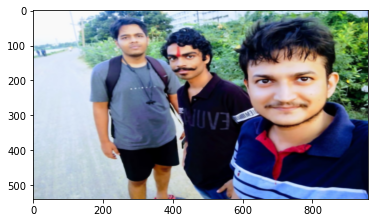

In [11]:
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
plt.imshow(ReSized5, cmap='gray')

In [12]:
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

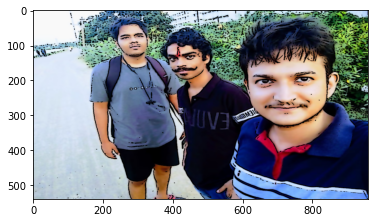

In [14]:
ReSized6 = cv2.resize(cartoonImage, (960, 540))
plt.imshow(ReSized6, cmap='gray')

In [15]:
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

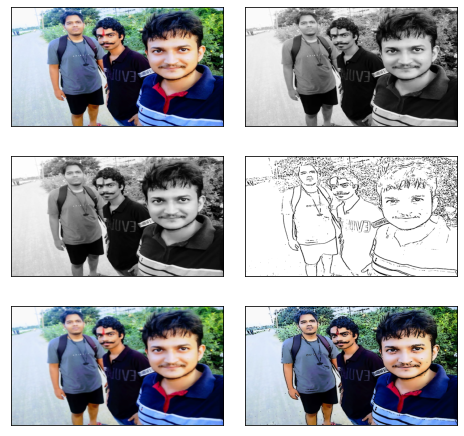

In [17]:
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')

In [18]:
plt.show()